## Swap test

In [1]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit import Parameter, ParameterVector

![fig1](./fig1.png)

### circuit 1

In [2]:
qc = QuantumCircuit(3,1)
qc.h(0)
qc.cswap(0,1,2)
qc.h(0)
qc.measure(0,0)

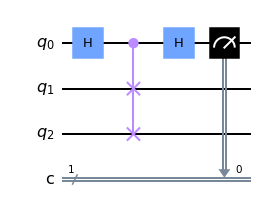

In [3]:
qc.draw('mpl')

In [4]:
def get_inner_product(circuit):
    shots= 8192 
    job = execute(circuit, Aer.get_backend('qasm_simulator'),shots=shots )
    counts = job.result().get_counts() 

    probs = {}
    for output in ['0','1']:
        if output in counts:
            probs[output] = counts[output]/shots #Calculate the average of a state
        else:
            probs[output] = 0
            
    return 2.0*probs['0']-1.0 #inner product

In [5]:
# inner product
get_inner_product(qc)

1.0

### circuit 2

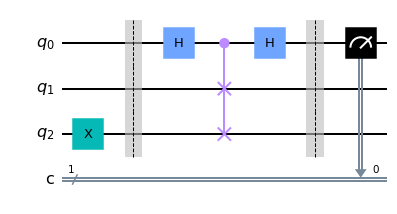

In [6]:
qc = QuantumCircuit(3,1)

#initial
qc.x(2)

# swap test
qc.barrier()
qc.h(0)
qc.cswap(0,1,2)
qc.h(0)
qc.barrier()
#
qc.measure(0,0)
qc.draw('mpl')

In [7]:
get_inner_product(qc)

-0.01806640625

### circuit3

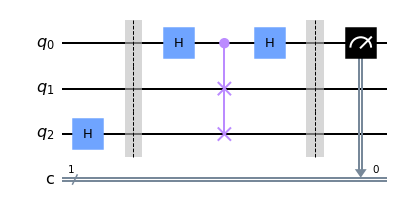

In [8]:
qc = QuantumCircuit(3,1)

#initial
qc.h(2)

# swap test
qc.barrier()
qc.h(0)
qc.cswap(0,1,2)
qc.h(0)
qc.barrier()
#
qc.measure(0,0)
qc.draw('mpl')

In [9]:
get_inner_product(qc)

0.492919921875

## multi swap test

$$ |\langle \psi_1|\psi_2 \rangle|^2|\langle \psi_3|\psi_4 \rangle|^2 = 2P(0)-1$$

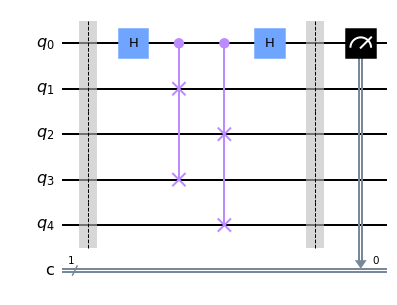

In [10]:
qc = QuantumCircuit(5,1)

#initial

# swap test
qc.barrier()
qc.h(0)
qc.cswap(0,1,3)
qc.cswap(0,2,4)
qc.h(0)
qc.barrier()
#
qc.measure(0,0)
qc.draw('mpl')

In [11]:
get_inner_product(qc)

1.0

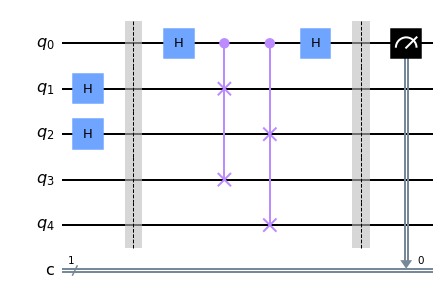

In [12]:
qc = QuantumCircuit(5,1)

#initial
qc.h(1)
qc.h(2)


# swap test
qc.barrier()
qc.h(0)
qc.cswap(0,1,3)
qc.cswap(0,2,4)
qc.h(0)
qc.barrier()
#
qc.measure(0,0)
qc.draw('mpl')

In [13]:
get_inner_product(qc)

0.249755859375

In [14]:
import qiskit.tools.jupyter
%qiskit_version_table